In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  LOAD DATASET
df = pd.read_csv('/content/USA_Housing_toy (3).csv')
print("Dataset preview:")
print(df.head())
print("\nColumns:", df.columns)

Dataset preview:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             79545                    6                          7   
1             79249                    6                          7   
2             61287                    6                          9   
3             63345                    7                          6   
4             59982                    5                          8   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09            23087  1.059034e+06   
1                          3.09            40173  1.505891e+06   
2                          5.13            36882  1.058988e+06   
3                          3.26            34310  1.260617e+06   
4                          4.23            26354  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA

In [4]:
# PREPROCESS DATA
if 'target' in df.columns:
    X = df.drop('target', axis=1)
else:
    #
    X = df.copy()

# Drop the 'Address' column as it's not a numerical feature
if 'Address' in X.columns:
    X = X.drop('Address', axis=1)

# Standardize features for better clustering and PCA results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

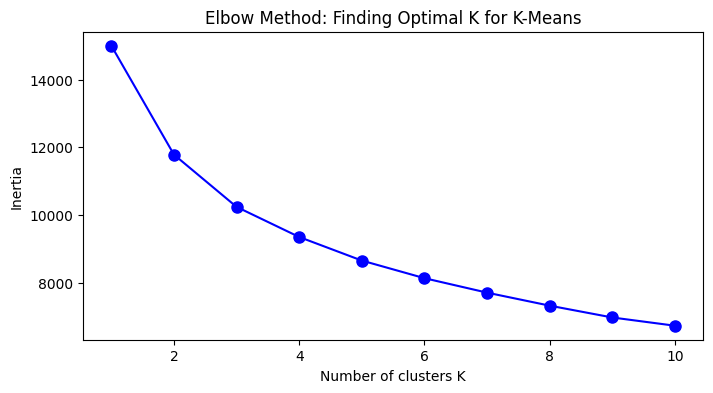

In [5]:
#  K-MEANS CLUSTERING
# Elbow method to find optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method: Finding Optimal K for K-Means')
plt.show()

optimal_k = 3

# Fit KMeans with optimal_k clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

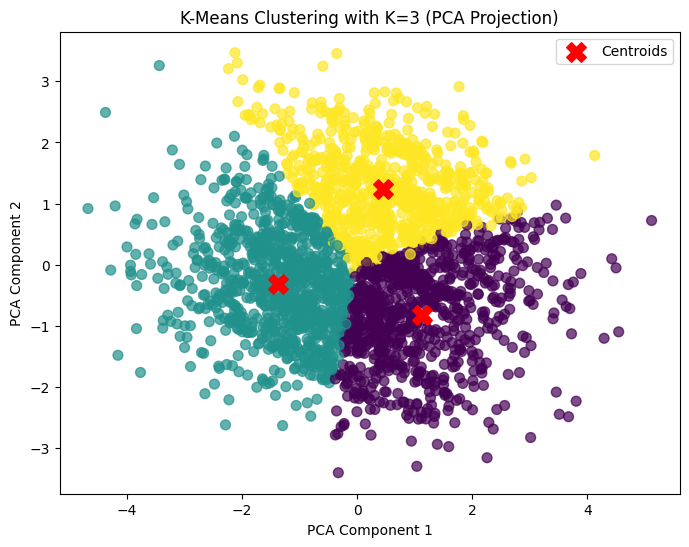

In [6]:

# . VISUALIZE CLUSTERS WITH PCA
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
centroids_pca = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with K={optimal_k} (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

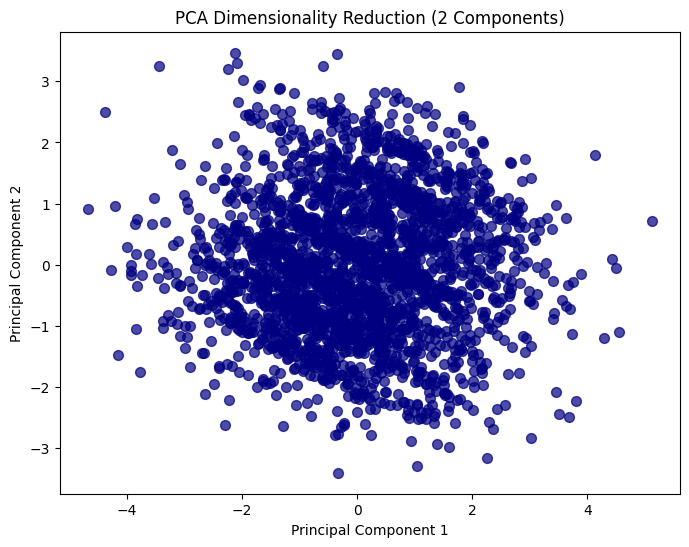

In [7]:

#  PCA DIMENSIONALITY REDUCTION
# Reduce features to 2 or 3 principal components and visualize
pca = PCA(n_components=2)
X_pca_features = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_features[:, 0], X_pca_features[:, 1], s=50, alpha=0.7, color='navy')
plt.title('PCA Dimensionality Reduction (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()